In [1]:
# Import libraries

import matplotlib.pyplot as plt
import matplotlib as mpl

import cartopy.crs as ccrs
#from cartopy.util import add_cyclic_point

import xarray as xr

import numpy as np

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

from matplotlib import colorbar, colors

from eofs.xarray import Eof


from bozza.function import searching_model_path, SearchingModelPath
from bozza.function import plot_part_of_map

In [2]:
SearchingModelPath.searching_model_path('ts_Amon_MIROC6_historical_r1i1p1f1_gn_185001-201412.nc')

PosixPath('/home/giodefa/Desktop/Unimib/Data Science/Second Year/Physics and environmental data lab/Environmental/Materiale Corso/Model Folder/ts_Amon_MIROC6_historical_r1i1p1f1_gn_185001-201412.nc')

In [3]:
path_model_ts_amon_mri =  searching_model_path('ts_Amon_MRI-AGCM3-2-S_highresSST-present_r1i1p1f1_gn_201001-201412(3).nc')
path_model_ts_amon_mri_2h = searching_model_path('ts_Amon_MRI-AGCM3-2-H_highresSST-present_r1i1p1f1_gn_195001-201412.nc')

In [4]:
path_model_ts_amon_hiram_1 = searching_model_path('ts_Amon_HiRAM-SIT-HR_highresSST-present_r1i1p1f1_gn_200801-200812.nc')
path_model_ts_amon_hiram_2 = searching_model_path('ts_Amon_HiRAM-SIT-HR_highresSST-present_r1i1p1f1_gn_200901-200912.nc')
path_model_ts_amon_hiram_3 = searching_model_path('ts_Amon_HiRAM-SIT-HR_highresSST-present_r1i1p1f1_gn_201001-201012.nc')
path_model_ts_amon_hiram_4 = searching_model_path('ts_Amon_HiRAM-SIT-HR_highresSST-present_r1i1p1f1_gn_201101-201112.nc')
path_model_ts_amon_hiram_5 = searching_model_path('ts_Amon_HiRAM-SIT-HR_highresSST-present_r1i1p1f1_gn_201201-201212.nc')
path_model_ts_amon_hiram_6 = searching_model_path('ts_Amon_HiRAM-SIT-HR_highresSST-present_r1i1p1f1_gn_201301-201312.nc')
path_model_ts_amon_hiram_7 = searching_model_path('ts_Amon_HiRAM-SIT-HR_highresSST-present_r1i1p1f1_gn_201401-201412.nc')

In [5]:
model_hiram_1 = xr.open_dataset(path_model_ts_amon_hiram_1)

model_hiram = xr.concat([
    xr.open_dataset(path_model_ts_amon_hiram_1),
    xr.open_dataset(path_model_ts_amon_hiram_2),
    xr.open_dataset(path_model_ts_amon_hiram_3),
    xr.open_dataset(path_model_ts_amon_hiram_4),
    xr.open_dataset(path_model_ts_amon_hiram_5),
    xr.open_dataset(path_model_ts_amon_hiram_6),
    xr.open_dataset(path_model_ts_amon_hiram_7),
], dim = "time")
model_hiram = model_hiram.sel(time=slice('2010-01','2014-12'))

In [6]:
temperature_surface_model_hiram = model_hiram.ts - 273.15
temperature_surface_model_hiram

<xarray.DataArray 'ts' (time: 60, lat: 768, lon: 1536)>
array([[[-27.17215 , -27.17215 , -27.17215 , ..., -27.17215 ,
         -27.17215 , -27.17215 ],
        [-26.973328, -26.973785, -26.974243, ..., -26.97197 ,
         -26.972427, -26.97287 ],
        [-26.879227, -26.879395, -26.879562, ..., -26.878723,
         -26.878891, -26.879059],
        ...,
        [-28.057281, -28.057892, -28.058517, ..., -28.05545 ,
         -28.05606 , -28.056671],
        [-28.298874, -28.299286, -28.299683, ..., -28.297653,
         -28.29805 , -28.298462],
        [-28.477097, -28.477097, -28.477097, ..., -28.477097,
         -28.477097, -28.477097]],

       [[-33.85408 , -33.85408 , -33.85408 , ..., -33.85408 ,
         -33.85408 , -33.85408 ],
        [-33.72206 , -33.722366, -33.722656, ..., -33.72116 ,
         -33.72145 , -33.721756],
        [-33.80327 , -33.802963, -33.802643, ..., -33.8042  ,
         -33.803894, -33.803574],
...
        [-27.849838, -27.849731, -27.849625, ..., -27.850174,
         -27.850067, -27.84996 ],
        [-27.811356, -27.811325, -27.81131 , ..., -27.811417,
         -27.811401, -27.81137 ],
        [-27.801437, -27.801437, -27.801437, ..., -27.801437,
         -27.801437, -27.801437]],

       [[-26.579361, -26.579361, -26.579361, ..., -26.579361,
         -26.579361, -26.579361],
        [-26.439636, -26.439957, -26.440277, ..., -26.438675,
         -26.438995, -26.439316],
        [-26.415955, -26.41594 , -26.41594 , ..., -26.41597 ,
         -26.41597 , -26.415955],
        ...,
        [-27.41307 , -27.412903, -27.412735, ..., -27.41359 ,
         -27.413406, -27.413239],
        [-27.356964, -27.35698 , -27.35701 , ..., -27.356888,
         -27.356918, -27.356934],
        [-27.367508, -27.367508, -27.367508, ..., -27.367508,
         -27.367508, -27.367508]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -89.88 -89.65 -89.41 -89.18 ... 89.41 89.65 89.88
  * lon      (lon) float64 0.1172 0.3516 0.5859 0.8203 ... 359.4 359.6 359.9

In [7]:
temperature_surface_model_hiram

<xarray.DataArray 'ts' (time: 60, lat: 768, lon: 1536)>
array([[[-27.17215 , -27.17215 , -27.17215 , ..., -27.17215 ,
         -27.17215 , -27.17215 ],
        [-26.973328, -26.973785, -26.974243, ..., -26.97197 ,
         -26.972427, -26.97287 ],
        [-26.879227, -26.879395, -26.879562, ..., -26.878723,
         -26.878891, -26.879059],
        ...,
        [-28.057281, -28.057892, -28.058517, ..., -28.05545 ,
         -28.05606 , -28.056671],
        [-28.298874, -28.299286, -28.299683, ..., -28.297653,
         -28.29805 , -28.298462],
        [-28.477097, -28.477097, -28.477097, ..., -28.477097,
         -28.477097, -28.477097]],

       [[-33.85408 , -33.85408 , -33.85408 , ..., -33.85408 ,
         -33.85408 , -33.85408 ],
        [-33.72206 , -33.722366, -33.722656, ..., -33.72116 ,
         -33.72145 , -33.721756],
        [-33.80327 , -33.802963, -33.802643, ..., -33.8042  ,
         -33.803894, -33.803574],
...
        [-27.849838, -27.849731, -27.849625, ..., -27.850174,
         -27.850067, -27.84996 ],
        [-27.811356, -27.811325, -27.81131 , ..., -27.811417,
         -27.811401, -27.81137 ],
        [-27.801437, -27.801437, -27.801437, ..., -27.801437,
         -27.801437, -27.801437]],

       [[-26.579361, -26.579361, -26.579361, ..., -26.579361,
         -26.579361, -26.579361],
        [-26.439636, -26.439957, -26.440277, ..., -26.438675,
         -26.438995, -26.439316],
        [-26.415955, -26.41594 , -26.41594 , ..., -26.41597 ,
         -26.41597 , -26.415955],
        ...,
        [-27.41307 , -27.412903, -27.412735, ..., -27.41359 ,
         -27.413406, -27.413239],
        [-27.356964, -27.35698 , -27.35701 , ..., -27.356888,
         -27.356918, -27.356934],
        [-27.367508, -27.367508, -27.367508, ..., -27.367508,
         -27.367508, -27.367508]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -89.88 -89.65 -89.41 -89.18 ... 89.41 89.65 89.88
  * lon      (lon) float64 0.1172 0.3516 0.5859 0.8203 ... 359.4 359.6 359.9

In [8]:
model_mri = xr.open_dataset(path_model_ts_amon_mri)
temperature_surface_mri = model_mri.ts - 273.15
temperature_surface_mri

<xarray.DataArray 'ts' (time: 60, lat: 960, lon: 1920)>
array([[[-25.986008, -25.988113, -25.990234, ..., -25.996384,
         -26.000198, -25.984344],
        [-25.796295, -25.799194, -25.801743, ..., -25.807358,
         -25.80893 , -25.794983],
        [-25.550644, -25.550278, -25.549347, ..., -25.557587,
         -25.554108, -25.55362 ],
        ...,
        [-36.694595, -36.693253, -36.692307, ..., -36.696823,
         -36.696182, -36.695297],
        [-36.55638 , -36.555283, -36.554016, ..., -36.557205,
         -36.556564, -36.557037],
        [-36.403458, -36.404434, -36.403473, ..., -36.403366,
         -36.404037, -36.403214]],

       [[-36.971893, -36.957718, -36.962097, ..., -36.969025,
         -36.971222, -36.974716],
        [-36.81317 , -36.800186, -36.802475, ..., -36.805832,
         -36.808   , -36.811447],
        [-36.56662 , -36.5661  , -36.56488 , ..., -36.57144 ,
         -36.568604, -36.5679  ],
...
        [-26.289917, -26.287537, -26.294586, ..., -26.28447 ,
         -26.290253, -26.287277],
        [-26.31073 , -26.301743, -26.307419, ..., -26.307129,
         -26.302475, -26.303055],
        [-26.336807, -26.341797, -26.337555, ..., -26.345703,
         -26.34018 , -26.33841 ]],

       [[-24.08371 , -24.084045, -24.085358, ..., -24.08287 ,
         -24.084259, -24.085861],
        [-24.049332, -24.048172, -24.050674, ..., -24.042877,
         -24.044907, -24.047165],
        [-23.943542, -23.945343, -23.946823, ..., -23.93547 ,
         -23.937592, -23.94107 ],
        ...,
        [-29.64746 , -29.639542, -29.652939, ..., -29.640182,
         -29.65422 , -29.64476 ],
        [-29.631165, -29.611526, -29.618652, ..., -29.62912 ,
         -29.617691, -29.617554],
        [-29.65355 , -29.664673, -29.657303, ..., -29.668213,
         -29.658585, -29.654633]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -89.86 -89.67 -89.48 -89.3 ... 89.3 89.48 89.67 89.86
  * lon      (lon) float64 0.0 0.1875 0.375 0.5625 ... 359.2 359.4 359.6 359.8

In [9]:
print(f'il numero di lon è {len(temperature_surface_mri.lon)} e il numero di lat è {len(temperature_surface_mri.lat)}')

il numero di lon è 1920 e il numero di lat è 960


In [10]:
print(f'il numero di lon è {len(temperature_surface_model_hiram.lon)} e il numero di lat è {len(temperature_surface_model_hiram.lat)}')

il numero di lon è 1536 e il numero di lat è 768


In [ ]:
#d1.coords['lon'] = (d1.coords['lon'] + 180) % 360 - 180
#d1 = d1.sortby(d1.lon)

In [ ]:
#fig = plt.figure(figsize=(20, 10))
#p0 = temperature_surface_model_hiram.mean('time').plot(transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.Robinson()},
#                            cmap='jet')
#p0.axes.coastlines()
#p0.axes.gridlines()
#plt.rcParams["figure.figsize"] = (10,10)
#plt.title('Temperature' )

Text(0.5, 1.0, 'Temperature')

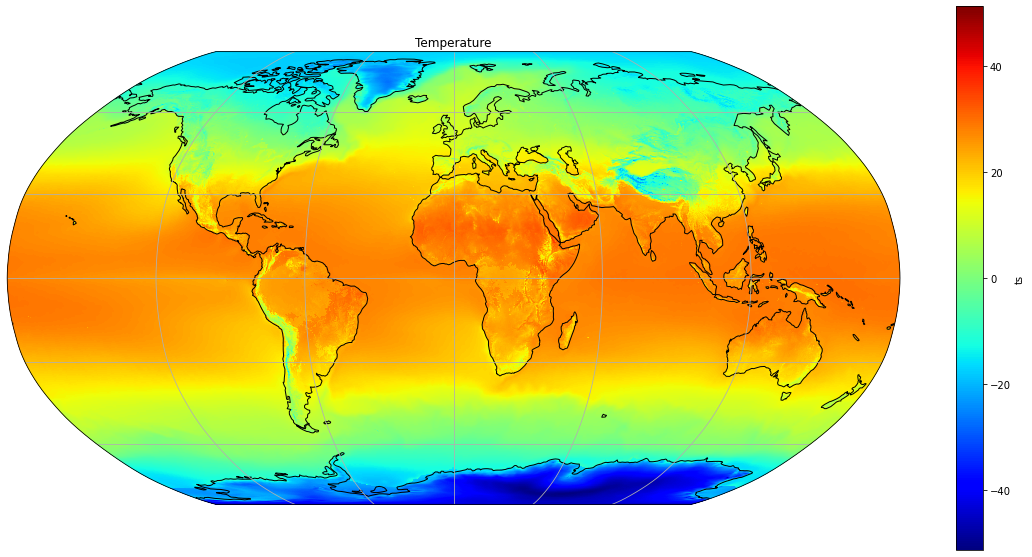

In [11]:
fig = plt.figure(figsize=(20, 10))
p0 = temperature_surface_mri.mean('time').plot(transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.Robinson()},
                            cmap='jet')
p0.axes.coastlines()
p0.axes.gridlines()
plt.rcParams["figure.figsize"] = (10,10)
plt.title('Temperature' )

# Project

- The idea is using two or more model try to apply some sort of clustering methods, so i want to divide my project in two part, one is for the spatial clustering, so i want to slice my maps into smaller part and try to cluster it, maybe i can take only one specific periods(2000-2014) take the anomalies.
- and the second part is using time series, so i have to aggregate in the spatial way my info, try to do some sort of time series clustering, something like my data science lab project.

so the first part of the project is trying to subdivide my area in subgrups. the only things that is have to take in mind is that i have to try to take the spacial information with all the data

In [12]:
model_hiram_1 = xr.open_dataset(path_model_ts_amon_hiram_1)

model_hiram = xr.concat([
    xr.open_dataset(path_model_ts_amon_hiram_1),
    xr.open_dataset(path_model_ts_amon_hiram_2),
    xr.open_dataset(path_model_ts_amon_hiram_3),
    xr.open_dataset(path_model_ts_amon_hiram_4),
    xr.open_dataset(path_model_ts_amon_hiram_5),
    xr.open_dataset(path_model_ts_amon_hiram_6),
    xr.open_dataset(path_model_ts_amon_hiram_7),
], dim = "time")
model_hiram = model_hiram.sel(time=slice('2010-01','2014-12'))



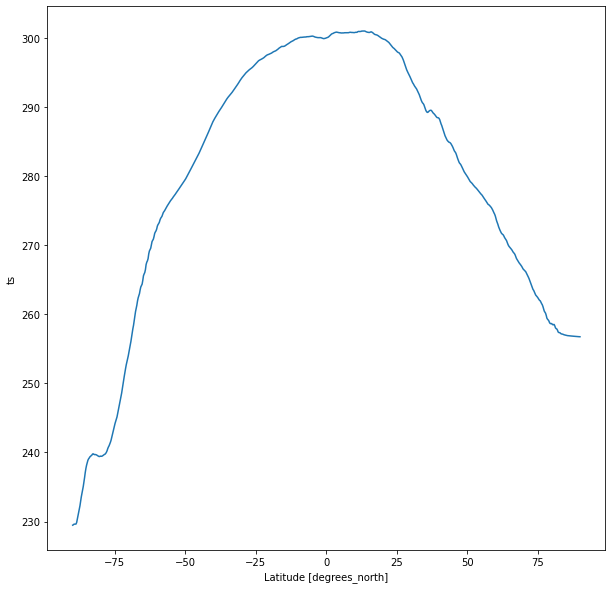

In [13]:
model_hiram.ts.mean(('time','lon')).plot()

In [14]:
model_hiram['anomaly'] = (model_hiram.ts - 273) - (model_hiram.ts.mean(('time','lon'))- 273)

Text(0.5, 1.0, 'Temperature')

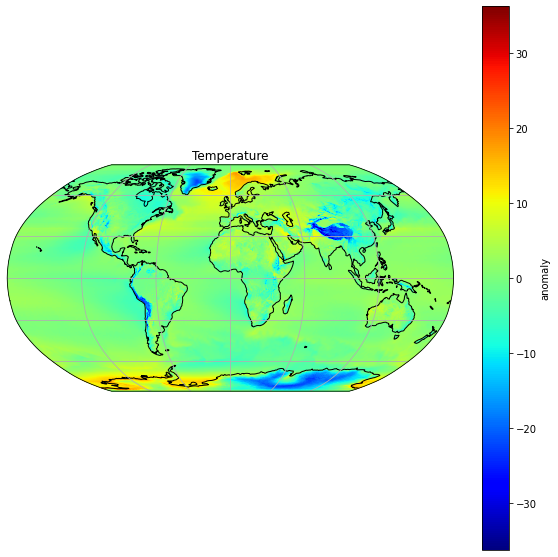

In [15]:


p0 = model_hiram.anomaly.mean('time').plot(transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.Robinson()},
                            cmap='jet')
p0.axes.coastlines()
p0.axes.gridlines()
plt.rcParams["figure.figsize"] = (10,10)
plt.title('Temperature' )



In [16]:
model_mri_interp = model_mri.copy()
model_mri_interp = model_mri_interp.interp(lat=model_hiram.lat, lon=model_hiram.lon, method='linear')

/home/giodefa/anaconda3/envs/final_exam_envi/lib/python3.10/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/giodefa/anaconda3/envs/final_exam_envi/lib/python3.10/site-packages/xarray/core/missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/home/giodefa/anaconda3/envs/final_exam_envi/lib/python3.10/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/giodefa/anaconda3/envs/final_exam_envi/lib/python3.10/site-packages/xarray/c

In [17]:
print(f'il numero di lon è {len(model_mri_interp.lon)} e il numero di lat è {len(model_mri_interp.lat)}')
print(f'il numero di lon è {len(model_hiram.lon)} e il numero di lat è {len(model_hiram.lat)}')

il numero di lon è 1536 e il numero di lat è 768
il numero di lon è 1536 e il numero di lat è 768


In [ ]:
#model_mri_interp_celsius_mean_time = model_mri_interp.mean('time', keep_attrs=True)
#model_hiram_celsius_mean_time = model_hiram.mean('time', keep_attrs=True)

#ens = model_mri_interp_celsius_mean_time.merge(model_hiram_celsius_mean_time.ts.rename('ts2'))
#ens = ens.drop_vars(('lat_bnds','lon_bnds'))
#ens

In [18]:
ens = model_mri_interp.merge(model_hiram.ts.rename('ts2'))
ens = ens.drop_vars(('lat_bnds','lon_bnds','time_bnds'))
ens

<xarray.Dataset>
Dimensions:  (time: 60, lat: 768, lon: 1536)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -89.88 -89.65 -89.41 -89.18 ... 89.41 89.65 89.88
  * lon      (lon) float64 0.1172 0.3516 0.5859 0.8203 ... 359.4 359.6 359.9
Data variables:
    ts       (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    ts2      (time, lat, lon) float32 246.0 246.0 246.0 ... 245.8 245.8 245.8
Attributes: (12/36)
    Conventions:           CF-1.7 CMIP-6.2
    activity_id:           HighResMIP
    branch_method:         no parent
    creation_date:         2019-06-12T08:35:27Z
    data_specs_version:    01.00.23
    experiment:            forced atmosphere experiment for 1950-2014
    ...                    ...
    title:                 MRI-AGCM3-2-S output prepared for CMIP6
    variable_id:           ts
    variant_label:         r1i1p1f1
    license:               CMIP6 model data produced by MRI is licensed under...
    cmor_version:          3.3.2
    tracking_id:           hdl:21.14100/bdb472b5-bfd5-4ec7-84c3-cfcb3291f310

In [19]:
ens['ts_anomaly'] = (ens.ts - 273) - (ens.ts.mean(('time', 'lon'))-273)
ens['ts2_anomaly'] =( ens.ts2 - 273) - (ens.ts2.mean(('time', 'lon')) - 273)
ens = ens.drop_vars(('ts','ts2'))
ens

<xarray.Dataset>
Dimensions:      (time: 60, lat: 768, lon: 1536)
Coordinates:
  * time         (time) datetime64[ns] 2010-01-16T12:00:00 ... 2014-12-16T12:...
  * lat          (lat) float64 -89.88 -89.65 -89.41 -89.18 ... 89.41 89.65 89.88
  * lon          (lon) float64 0.1172 0.3516 0.5859 0.8203 ... 359.4 359.6 359.9
Data variables:
    ts_anomaly   (time, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    ts2_anomaly  (time, lat, lon) float32 16.51 16.51 16.51 ... -10.95 -10.95
Attributes: (12/36)
    Conventions:           CF-1.7 CMIP-6.2
    activity_id:           HighResMIP
    branch_method:         no parent
    creation_date:         2019-06-12T08:35:27Z
    data_specs_version:    01.00.23
    experiment:            forced atmosphere experiment for 1950-2014
    ...                    ...
    title:                 MRI-AGCM3-2-S output prepared for CMIP6
    variable_id:           ts
    variant_label:         r1i1p1f1
    license:               CMIP6 model data produced by MRI is licensed under...
    cmor_version:          3.3.2
    tracking_id:           hdl:21.14100/bdb472b5-bfd5-4ec7-84c3-cfcb3291f310

In [20]:
ens_mean = ens.to_array(dim='new').mean('new')
ens_stdev = ens.to_array(dim='new2').std('new2')

ens['ens_mean'] = ens_mean  # convert to Celsius
ens['ens_stdev'] = ens_stdev
ens = ens.drop_vars(('ts_anomaly','ts2_anomaly'))

ens.coords['lon'] = (ens.coords['lon'] + 180) % 360 - 180
ens = ens.sortby(ens.lon)

ens

<xarray.Dataset>
Dimensions:    (time: 60, lat: 768, lon: 1536)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat        (lat) float64 -89.88 -89.65 -89.41 -89.18 ... 89.41 89.65 89.88
  * lon        (lon) float64 -179.9 -179.6 -179.4 -179.2 ... 179.4 179.6 179.9
Data variables:
    ens_mean   (time, lat, lon) float64 16.32 16.32 16.32 ... -10.97 -10.97
    ens_stdev  (time, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/36)
    Conventions:           CF-1.7 CMIP-6.2
    activity_id:           HighResMIP
    branch_method:         no parent
    creation_date:         2019-06-12T08:35:27Z
    data_specs_version:    01.00.23
    experiment:            forced atmosphere experiment for 1950-2014
    ...                    ...
    title:                 MRI-AGCM3-2-S output prepared for CMIP6
    variable_id:           ts
    variant_label:         r1i1p1f1
    license:               CMIP6 model data produced by MRI is licensed under...
    cmor_version:          3.3.2
    tracking_id:           hdl:21.14100/bdb472b5-bfd5-4ec7-84c3-cfcb3291f310

Text(0.5, 1.0, 'Temperature')

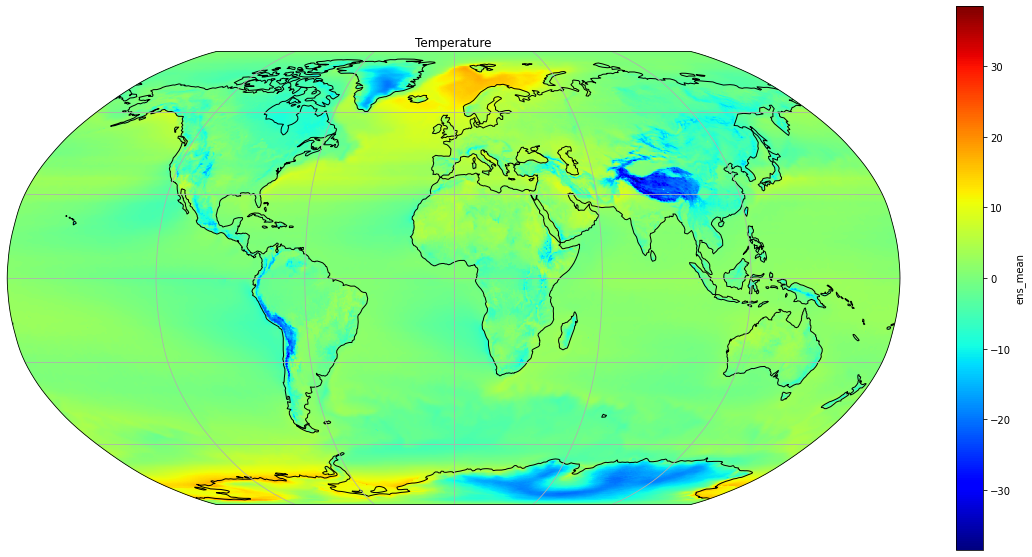

In [21]:
fig = plt.figure(figsize=(20, 10))
p0 = ens.ens_mean.mean('time').plot(transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.Robinson()},
                            cmap='jet')
p0.axes.coastlines()
p0.axes.gridlines()
plt.rcParams["figure.figsize"] = (10,10)
plt.title('Temperature' )

In [12]:
def plot_part_of_map(ens,a,b,c,d):
    """Plot a part of a map"""

    d1_nat = ens.sel(lat=slice(a,b), lon=slice(c,d))
    psl_nat=d1_nat.ens_mean
    fig = plt.figure(figsize=(10,7))  # x,y(inches)

    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_title(''.join(['ciao','\n']))
    ax.set_global()
    mm = ax.contourf(psl_nat.lon, psl_nat.lat, psl_nat.mean(axis=0), transform=ccrs.PlateCarree(), cmap='jet')

    ax.coastlines()
    ax.gridlines(draw_labels=True)

    # add colorbar
    cbar_ax = fig.add_axes([0.28, 0.10, 0.46, 0.05])
    cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='horizontal')
    # [left, bottom, width, height]
    cbar.set_label('Anomaly Temperature')
    cbar.ax.tick_params(labelsize=8)

    plt.show()
    plt.close()

    return


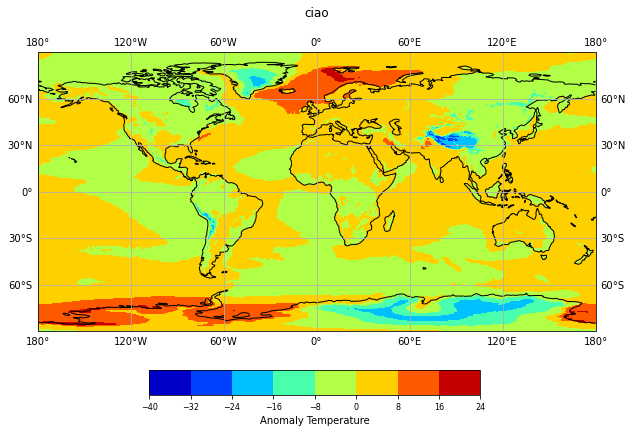

In [13]:
plot_part_of_map(ens,-90,90,-180,180)

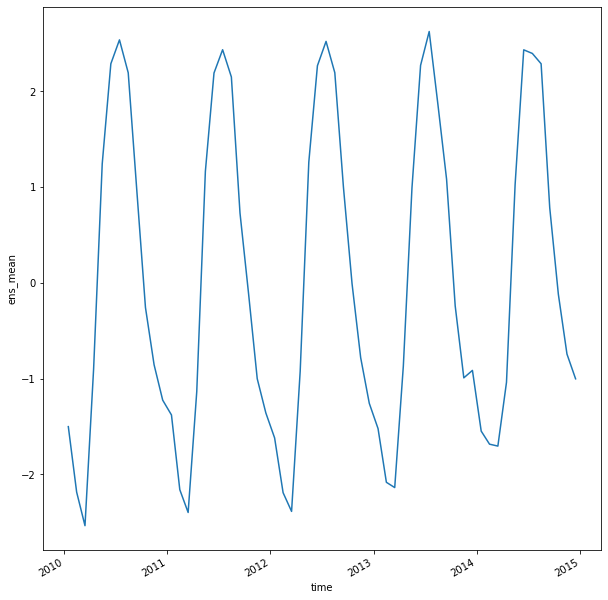

In [20]:
ens.ens_mean.mean(('lat','lon')).plot()

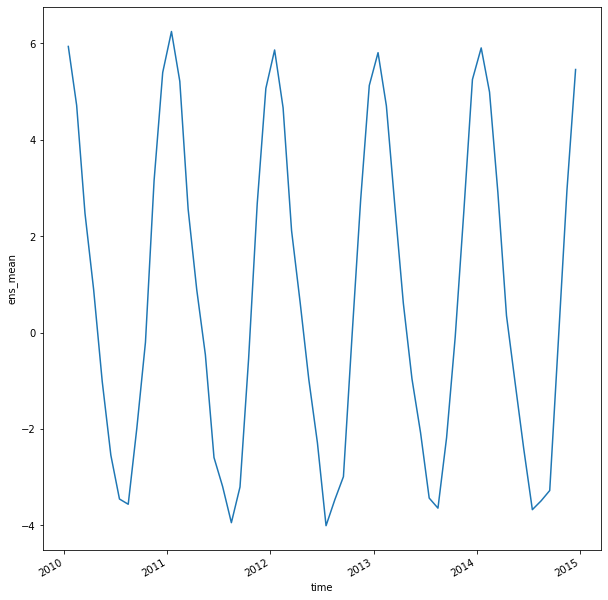

In [18]:
ens.ens_mean.sel(lon=slice(-90,0),lat=slice(-180,0)).mean(('lat','lon')).plot()

In [48]:
resol = 1 #5 # degrees (E and N)
nlon = np.int(360/resol)
nlat = np.int(180/resol)
data_mo = np.empty([nlat*nlon, 60],dtype=float)
data_mo.shape

/tmp/ipykernel_79541/3217404769.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  nlon = np.int(360/resol)
/tmp/ipykernel_79541/3217404769.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more 

(64800, 60)

In [116]:
np.array(ens.ens_mean.sel(lat=slice(-90,-89),lon=slice(-180,-179)).mean(('lat','lon'))).reshape(1,60)

(1, 60)

In [91]:
ens.ens_mean.sel(lat=slice(-180,179),lon=slice(-90,-89)).mean(('lat','lon')).shape

(60,)

In [117]:
data_mo[0] = np.array(ens.ens_mean.sel(lat=slice(-90,-89),lon=slice(-180,-179)).mean(('lat','lon'))).reshape(1,60)

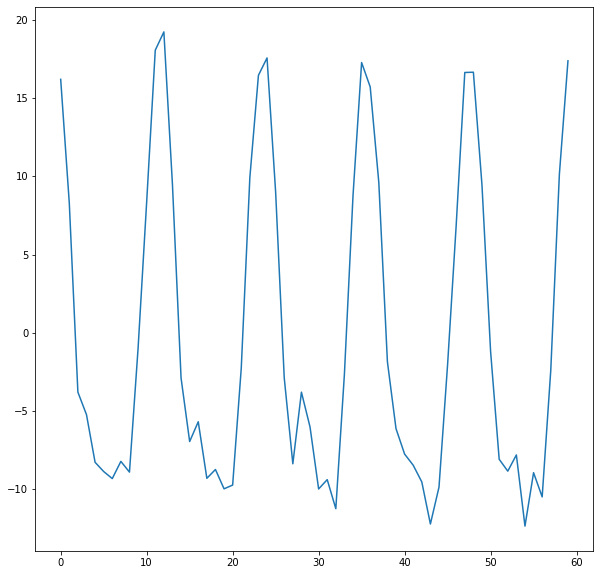

In [118]:
plt.plot(data_mo[0])

In [22]:
ens.ens_mean.sel(lat=slice(-180,-179),lon=slice(-90,-89))

<xarray.DataArray 'ens_mean' (time: 60, lat: 0, lon: 4)>
array([], shape=(60, 0, 4), dtype=float64)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 
  * lon      (lon) float64 -89.88 -89.65 -89.41 -89.18

In [43]:
ens.ens_mean.sel(lat=slice(-90,-89),lon=slice(-180,-179))

<xarray.DataArray 'ens_mean' (time: 60, lat: 4, lon: 4)>
array([[[ 16.31614685,  16.31614685,  16.31614685,  16.31614685],
        [ 16.63427823,  16.63386717,  16.6324583 ,  16.63701095],
        [ 16.13918019,  16.14230952,  16.14293284,  16.14706516],
        [ 15.75355994,  15.75824665,  15.76021752,  15.76632319]],

       [[  9.76705933,   9.76705933,   9.76705933,   9.76705933],
        [  8.07203307,   8.07618534,   8.07543308,   8.07351152],
        [  7.78570834,   7.78939497,   7.79316114,   7.79189636],
        [  7.56288491,   7.56723425,   7.56688502,   7.5704051 ]],

       [[ -2.13668823,  -2.13668823,  -2.13668823,  -2.13668823],
        [ -3.9248046 ,  -3.92825037,  -3.92297112,  -3.92566818],
        [ -4.34687697,  -4.34548711,  -4.34711399,  -4.34399727],
        [ -4.8023131 ,  -4.80004705,  -4.80203516,  -4.80048795]],

       [[ -4.85971069,  -4.85971069,  -4.85971069,  -4.85971069],
        [ -5.34084119,  -5.34704005,  -5.3319269 ,  -5.3385731 ],
        [ -5.32713444,  -5.32150996,  -5.31786223,  -5.32299578],
        [ -5.4491003 ,  -5.44878623,  -5.44151707,  -5.45057745]],

...

       [[ -9.90852356,  -9.90852356,  -9.90852356,  -9.90852356],
        [-10.54301255, -10.54812045, -10.53505812, -10.54176699],
        [-10.64668732, -10.63886519, -10.64170476, -10.63636207],
        [-10.94732463, -10.93491528, -10.93175043, -10.92190302]],

       [[ -4.58998108,  -4.58998108,  -4.58998108,  -4.58998108],
        [ -1.3811472 ,  -1.3796202 ,  -1.37858141,  -1.37780409],
        [ -1.67275771,  -1.66934757,  -1.66638514,  -1.66276797],
        [ -2.00904508,  -2.00420784,  -2.00091841,  -1.99464105]],

       [[  9.29023743,   9.29023743,   9.29023743,   9.29023743],
        [ 10.84875341,  10.85086846,  10.8510535 ,  10.85254112],
        [ 10.37898922,  10.38374413,  10.38592493,  10.38919476],
        [  9.94526335,   9.95151716,   9.9560929 ,   9.96012235]],

       [[ 16.95362854,  16.95362854,  16.95362854,  16.95362854],
        [ 17.95179446,  17.9523423 ,  17.95374265,  17.95494085],
        [ 17.52330587,  17.52645151,  17.52920629,  17.53241938],
        [ 17.14684666,  17.15153601,  17.15458061,  17.16087221]]])
Coordinates:
  * time     (time) datetime64[ns] 2010-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -89.88 -89.65 -89.41 -89.18
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.2

In [53]:
# Iterate over grid cells and
# - get the average time series of all stations in grid cell at monthy resolution
# - integrate to annual resolutin
c = 0
for j in range(-180,180):
  for i in range(-90,90):

      data_mo[c] = np.array(ens.ens_mean.sel(lat=slice(i,i+1),lon=slice(j,j+1)).mean(('lat','lon'))).reshape(1,60)
      c += 1







In [66]:
np.savetxt('temp_file.csv', data_mo, delimiter=',')

In [ ]:
# Iterate over grid cells and
# - get the average time series of all stations in grid cell at monthy resolution
# - integrate to annual resolutin
c = 0
for j in range(-180,180):
  for i in range(-90,90):

      data_mo[c] = np.array(ens.ens_mean.sel(lat=slice(i,i+1),lon=slice(j,j+1)).mean(('time')))
      c += 1





